<div align="center"> <h3><font color='blue'>CSE 4/574 Introduction to Machine Learning, Summer 2025 </font>
<h1> Assignment 3 - Part 2,3 : Building a CNN

<h3>Jayant Som (jsom@buffalo.edu)
<h3>Rithvik Illandula (rithviki@buffalo.edu) </div>
<h3>_______________________________________________________________________________________________________________________________ </div>

<div align="center"> <h1><font color='maroon'> MNIST Dataset </font></div>

## 1. Imports

In [74]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

## 2. Data Loading

In [75]:
# Loaded the Fashion MNIST dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

## 3. Dataset Details

In [76]:
# Showing dataset structure
print("Training data shape:", trainX.shape)
print("Test data shape:", testX.shape)
print("Number of classes:", len(np.unique(trainy)))

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


In [77]:
# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [78]:
# Show class distribution
unique, count = np.unique(trainy, return_counts=True)
print("Class distribution in training set:")
for label, cnt in zip(unique, count):
    print(f"{class_names[label]} ({label}): {cnt} samples")

Class distribution in training set:
T-shirt/top (0): 6000 samples
Trouser (1): 6000 samples
Pullover (2): 6000 samples
Dress (3): 6000 samples
Coat (4): 6000 samples
Sandal (5): 6000 samples
Shirt (6): 6000 samples
Sneaker (7): 6000 samples
Bag (8): 6000 samples
Ankle boot (9): 6000 samples


## 4. Visualization

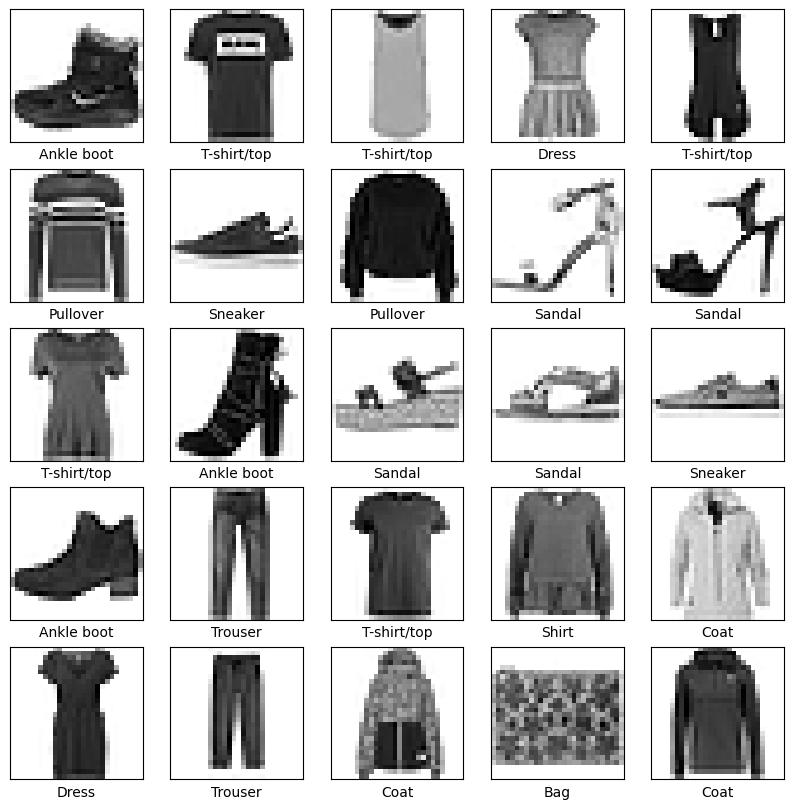

In [79]:
# Visualizing 25 samples from the dataset
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainy[i]])
    
plt.show()

## 5. Data Preprocessing

In [80]:
# Normalizing pixel values to [0, 1]
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [81]:
# Reshaping to include channel dimension for CNN input
trainX = trainX.reshape(-1, 28, 28, 1)
testX = testX.reshape(-1, 28, 28, 1)

In [82]:
# One-hot encoding of the labels
trainy_cat = to_categorical(trainy, num_classes=10)
testy_cat = to_categorical(testy, num_classes=10)

In [83]:
# Printing modified shape
print("trainX shape:", trainX.shape)
print("trainy_cat shape:", trainy_cat.shape)
print("testX shape:", testX.shape)
print("testy_cat shape:", testy_cat.shape)

trainX shape: (60000, 28, 28, 1)
trainy_cat shape: (60000, 10)
testX shape: (10000, 28, 28, 1)
testy_cat shape: (10000, 10)


## 6. Creating CNN Model

In [84]:
# Defining the CNN model
model_4_CNN = Sequential([
    
    Input(shape=(28, 28, 1)), # Input layer
    
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = (2, 2)),
    
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(10, activation='softmax')  # 10 classes output
])

In [85]:
# Compiling the model
model_4_CNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [86]:
# Printing model summary
model_4_CNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Training the model

In [87]:
train_hist_cnn = model_4_CNN.fit(trainX, trainy_cat,
                    epochs = 20,
                    batch_size = 128,
                    validation_split = 0.2,
                    callbacks = [EarlyStopping(patience = 4, restore_best_weights = True)])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.6731 - loss: 0.9100 - val_accuracy: 0.8590 - val_loss: 0.3832
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8445 - loss: 0.4327 - val_accuracy: 0.8835 - val_loss: 0.3256
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8656 - loss: 0.3715 - val_accuracy: 0.8891 - val_loss: 0.2965
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8772 - loss: 0.3362 - val_accuracy: 0.8948 - val_loss: 0.2874
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8888 - loss: 0.3088 - val_accuracy: 0.8985 - val_loss: 0.2654
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8915 - loss: 0.2959 - val_accuracy: 0.9066 - val_loss: 0.2545
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8971 - loss: 0.2814 - val_accuracy: 0.9063 - val_loss: 0.2494
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9078 - loss: 0.2564 - val_accu

## 8. Model evaluation

In [88]:
# Evaluating on test set
test_loss_cnn, test_acc_cnn = model_4_CNN.evaluate(testX, testy_cat, verbose = 0)
print(f"\n Test Accuracy: {test_acc_cnn:.4f}")


 Test Accuracy: 0.9233


## 9. Plot of model accuracy

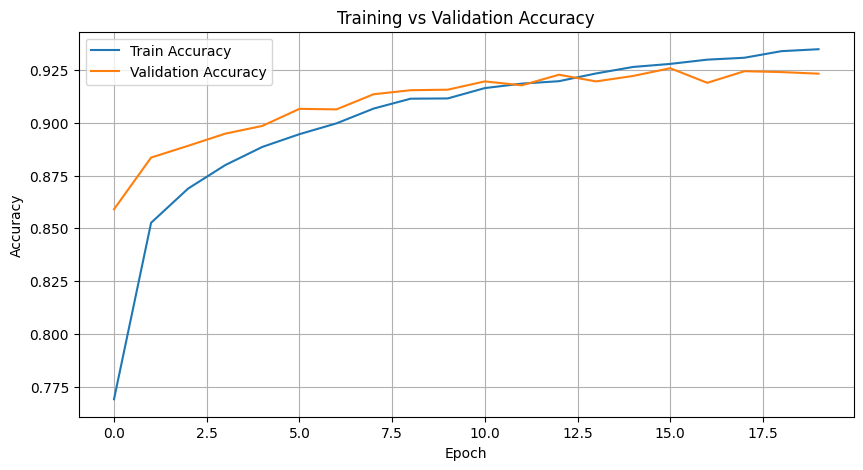

In [89]:
plt.figure(figsize = (10, 5))

plt.plot(train_hist_cnn.history['accuracy'], label = 'Train Accuracy')
plt.plot(train_hist_cnn.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.grid(True)
plt.show()

## 10. Plot of model loss

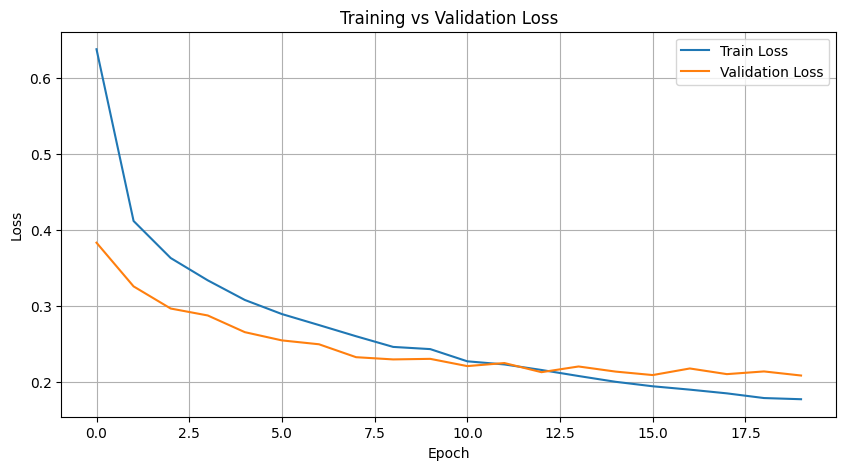

In [90]:
plt.figure(figsize=(10, 5))

plt.plot(train_hist_cnn.history['loss'], label = 'Train Loss')
plt.plot(train_hist_cnn.history['val_loss'], label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
plt.show()

<div align="center"> <h1> Part 3 : Bonus - Optimizations </font></div>

<h3>_______________________________________________________________________________________________________________________________ </div>

## 1. Imports

In [98]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

## 2. Optimization technique 1 : Enhanced Early Stopping

In [99]:
enhanced_early_stoppage = EarlyStopping(
    monitor = 'val_loss',
    patience = 8,
    restore_best_weights = True,
    min_delta = 0.001
)

## 3. Optimization technique 2 : Learning Rate Reduction

In [100]:
reduced_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

## 4. Retraining the model with optimization

In [101]:
train_hist_cnn_optimized = model_4_CNN.fit(
    trainX, trainy_cat,
    epochs = 30,  # Increased since we have early stopping
    validation_data = (testX, testy_cat),
    callbacks = [enhanced_early_stoppage, reduced_lr],
    verbose = 1
)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9369 - loss: 0.1667 - val_accuracy: 0.9274 - val_loss: 0.2114 - learning_rate: 5.0000e-04
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9433 - loss: 0.1513 - val_accuracy: 0.9283 - val_loss: 0.2079 - learning_rate: 5.0000e-04
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9451 - loss: 0.1465 - val_accuracy: 0.9277 - val_loss: 0.2133 - learning_rate: 5.0000e-04
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9458 - loss: 0.1432 - val_accuracy: 0.9288 - val_loss: 0.2245 - learning_rate: 5.0000e-04
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9466 - loss: 0.1398 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9466 - loss: 0.1398 - val_accuracy: 0.9278 - val_loss: 0.2167 - learning_rate: 5.0000e-04
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/s

## 5. Evaluating the optimized model

In [102]:
test_loss_cnn_opt, test_acc_cnn_opt = model_4_CNN.evaluate(testX, testy_cat, verbose = 0)

print(f"\nOriginal Test Accuracy: {test_acc_cnn:.4f}")
print(f"Optimized Test Accuracy: {test_acc_cnn_opt:.4f}")


Original Test Accuracy: 0.9233
Optimized Test Accuracy: 0.9283


## 6. Plot of model accuracy

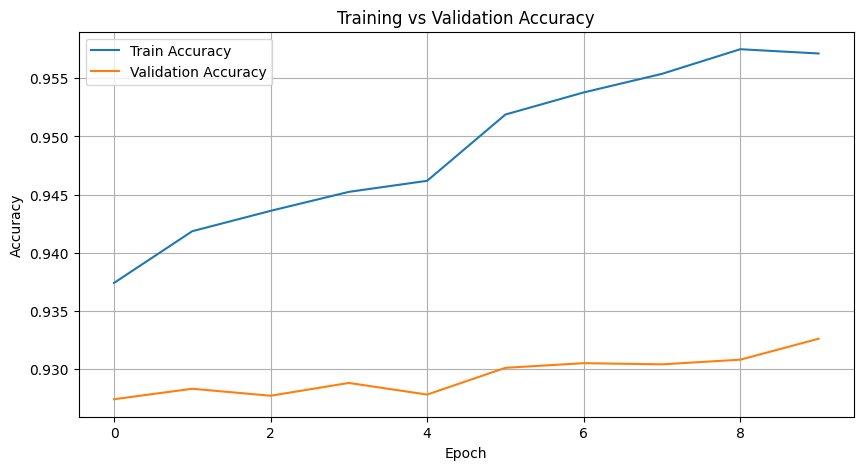

In [103]:
plt.figure(figsize = (10, 5))

plt.plot(train_hist_cnn_optimized.history['accuracy'], label = 'Train Accuracy')
plt.plot(train_hist_cnn_optimized.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.grid(True)
plt.show()

## 7. Plot of model loss

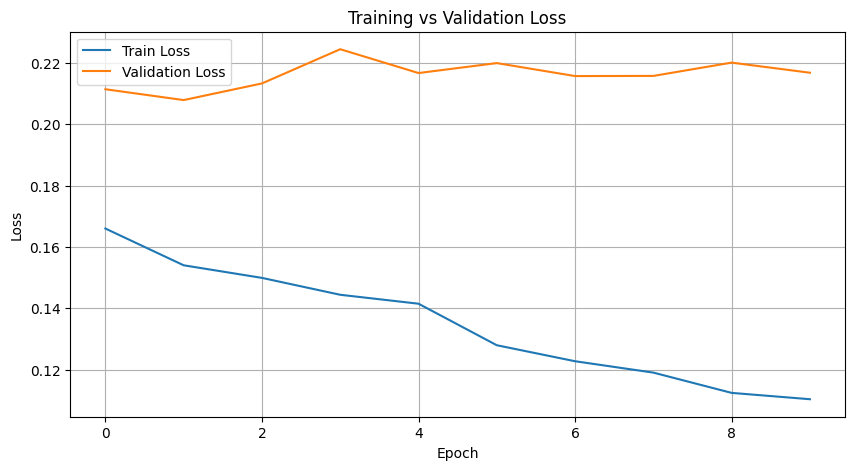

In [104]:
plt.figure(figsize=(10, 5))

plt.plot(train_hist_cnn_optimized.history['loss'], label = 'Train Loss')
plt.plot(train_hist_cnn_optimized.history['val_loss'], label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
plt.show()

## References Used

- https://www.tensorflow.org/tutorials/images/cnn
- https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch
- https://www.digitalocean.com/community/tutorials/constructing-neural-networks-from-scratch
- https://www.geeksforgeeks.org/deep-learning/convolutional-neural-network-cnn-in-tensorflow/
- https://towardsdatascience.com/building-a-convolutional-neural-network-cnns-from-scratch-3cfa453f9594/